# Assignment 1 - Applied Linear Algebra for Data Science

# Exercise 1

The figure below shows an electric circuit, with three power sources and six resistors.
There are four nodes (numbered 1-4) and three paths in the circuit. The corresponding
equation system to the right can be used to calculate the currents $I_1 - I_6$. The numbers
10, 17 and 14 in the right-hand-side is the voltage in the three power sources.

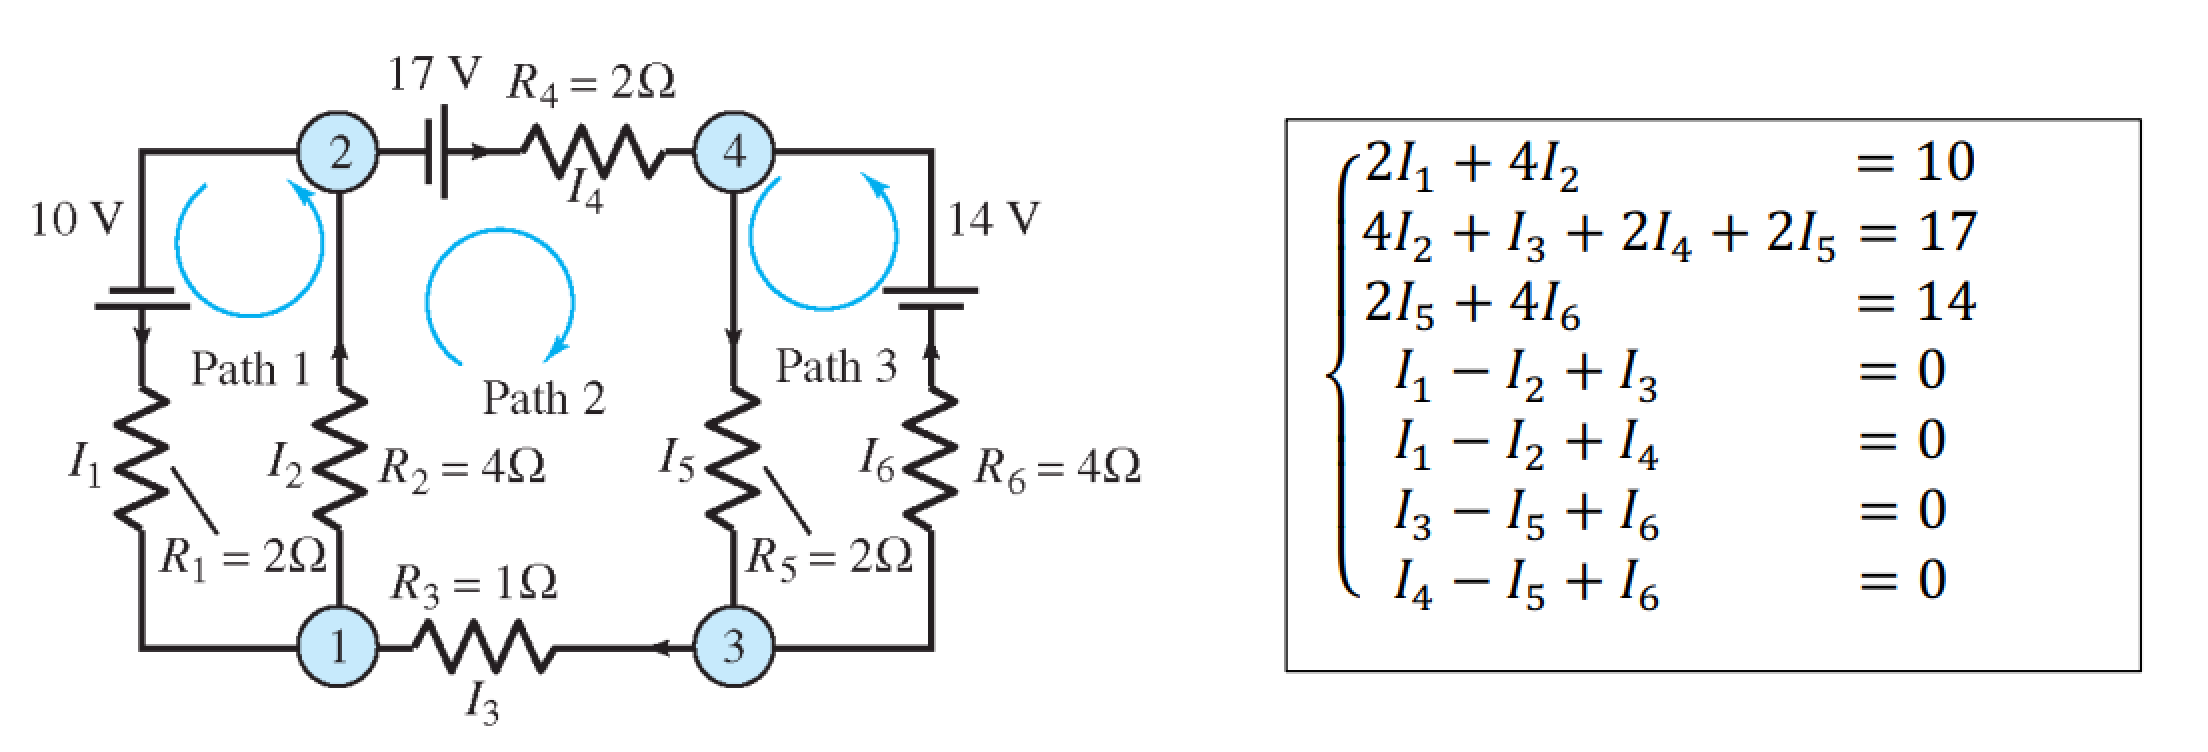

## 1a.

Write a Python (or Matlab or other language) program that computes the currents
$I_1-I_6$ and plot them in a histogram. You can use built-in tools in Python (you don’t
need implement a solver for the equation system). It must be easy to change the
voltages in the program. Run the program for a few different voltage choices.

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from time import process_time

In [2]:
# Define current/resistor matrix
M = np.matrix('2 4 0 0 0 0; 0 4 1 2 2 0; 0 0 0 0 2 4; 1 -1 1 0 0 0; 1 -1 0 1 0 0; 0 0 1 0 -1 1; 0 0 0 1 -1 1')

print(M)

[[ 2  4  0  0  0  0]
 [ 0  4  1  2  2  0]
 [ 0  0  0  0  2  4]
 [ 1 -1  1  0  0  0]
 [ 1 -1  0  1  0  0]
 [ 0  0  1  0 -1  1]
 [ 0  0  0  1 -1  1]]


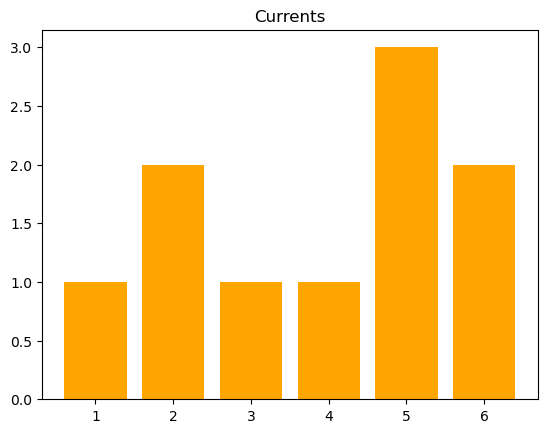

In [3]:
# Compute currents with matrix and voltages 1-3 as input 
def computeCurrents(M,v1,v2,v3):
    b = np.array([v1,v2,v3,0,0,0,0])
    return np.linalg.lstsq(M,b, rcond=None) # Least squares since it's an overdetermined system

# Plot currents given matrix and np lstsq solution
def plotCurrents(M,solution):
    plt.bar(np.arange(1, M.shape[1]+1), solution[0], color ='orange')
    plt.title("Currents")
    plt.show()
    
sol1 = computeCurrents(M,10,17,14)
plotCurrents(M,sol1)

### Using RREF with sympy

In [4]:
M2 = Matrix([[2, 4, 0, 0, 0, 0],[0, 4, 1, 2, 2, 0],[0, 0, 0, 0, 2, 4],[1, -1, 1, 0, 0, 0],[1, -1, 0, 1, 0, 0],[0, 0, 1, 0, -1, 1],[0, 0, 0, 1, -1, 1]])

# Sympy solver, performs rref and returns the result given a matrix A and RHS vector b
def sympySolve(A,b):
    A_aug = A.col_insert(A.shape[1],b)
    return A_aug.rref()[0]

sympySolve(M2, Matrix([[10], [17], [14], [0], [0], [0],[0]]))

Matrix([
[1, 0, 0, 0, 0, 0, 1],
[0, 1, 0, 0, 0, 0, 2],
[0, 0, 1, 0, 0, 0, 1],
[0, 0, 0, 1, 0, 0, 1],
[0, 0, 0, 0, 1, 0, 3],
[0, 0, 0, 0, 0, 1, 2],
[0, 0, 0, 0, 0, 0, 0]])

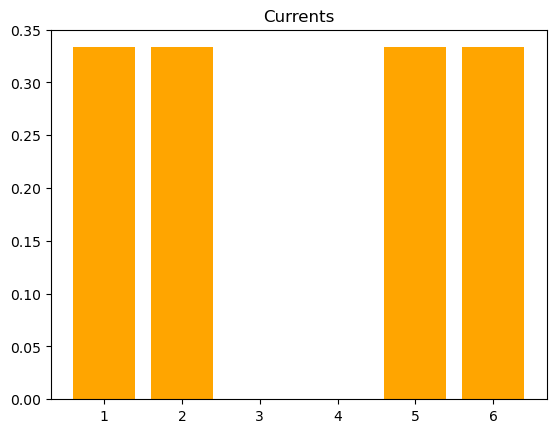

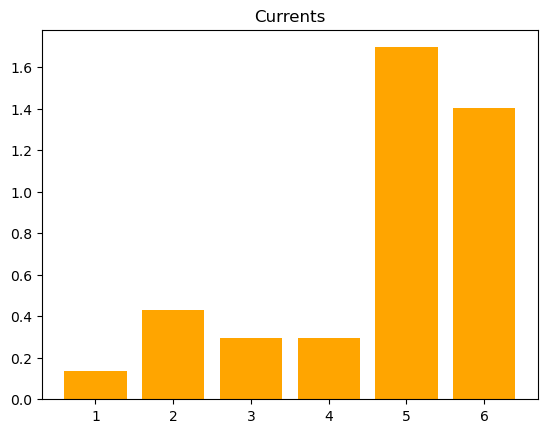

In [5]:
# Testing other voltages

sol2 = computeCurrents(M,2,2,2)
sol3 = computeCurrents(M,2,6,9)

plotCurrents(M,sol2)
plotCurrents(M,sol3)


### Testing other voltages with sympy

In [6]:
sympySolve(M2, Matrix([[2], [2], [2], [0], [0], [0],[0]]))

Matrix([
[1, 0, 0, 0, 0, 0, 1/3],
[0, 1, 0, 0, 0, 0, 1/3],
[0, 0, 1, 0, 0, 0,   0],
[0, 0, 0, 1, 0, 0,   0],
[0, 0, 0, 0, 1, 0, 1/3],
[0, 0, 0, 0, 0, 1, 1/3],
[0, 0, 0, 0, 0, 0,   0]])

In [7]:
sympySolve(M2, Matrix([[2], [6], [9], [0], [0], [0],[0]]))

Matrix([
[1, 0, 0, 0, 0, 0,    7/51],
[0, 1, 0, 0, 0, 0,   22/51],
[0, 0, 1, 0, 0, 0,    5/17],
[0, 0, 0, 1, 0, 0,    5/17],
[0, 0, 0, 0, 1, 0, 173/102],
[0, 0, 0, 0, 0, 1, 143/102],
[0, 0, 0, 0, 0, 0,       0]])

## 1b.

### i. What is the rank of the matrix?
The rank of the matrix is 6.

In [8]:
np.linalg.matrix_rank(M)

6

### ii. What is the dimension of the four fundamental subspaces $C(A), N(A), C(A^T)$ and $N(A^T)$ in this case?
In our case, we have that 
$$A_{m,n} = A_{7,6}, $$
and thus
- $\mathbb{C}(A)$ = rank(A) = 6 
- $\mathbb{N}(A)$ = n - r = 6 - 6 = 0
- $\mathbb{C}(A^T)$ = 6, same for rows and columns
- $\mathbb{N}(A^T)$ = m - r = 7 - 1 = 1

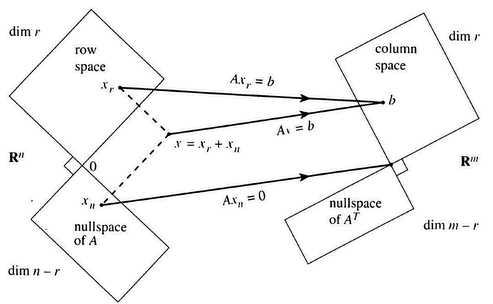

### iii. Which subspace does the solution vector belong to?

The general solution to the system is $\mathbf{x}=\mathbf{x}_p + \mathbf{x}_n$, where $\mathbf{x}_p$ is some solution to the system, and $\mathbf{x}_n$ is the homogenous (nullspace) solution to $A\mathbf{x} = \mathbf{0}$. It works because $A \mathbf{x} = A(\mathbf{x}_p+\mathbf{x}_n)=A \mathbf{x}_p + A \mathbf{x}_n = \mathbf{b} + \mathbf{0} = \mathbf{b}$.

Since $\mathbf{C}(A^T)$ and $\mathbf{N}(A)$ are orthogonal complements, they span the entire space $\mathbf{R}^n$ and every vector $\mathbf{x}$ from $\mathbf{R}^n$ can be expressed as $\mathbf{x} = \mathbf{x}_r + \mathbf{x}_n$ such that $\mathbf{x}_r$ is from the row space $\mathbf{C}(A^T)$ and $\mathbf{x}_n$ is from the nullspace $\mathbf{N}(A)$. Thus the solution vector $\mathbf{x}$ can be expressed as $\mathbf{x}_r + \mathbf{x}_n$ such that $\mathbf{x}_r$ belongs to $C(A^T)$ and $\mathbf{x}_n$ belongs to the nullspace $N(A)$. In our case, we have that $dim(\mathbf{N}(A))$ = 0, thus the solution vector belongs to the row space $\mathbb{C}(A^T)$.

### iv. Is the solution to the equation system unique given a certain right-hand-side? Motivate your answer.
Yes. For example, in the original RHS we have a unique solution. We have the property that $dim(\mathbf{N}(A)) = 0$, thus if there exists a solution to $A \mathbf{x} = \mathbf{b}$, it must be unique.

### v. Which subspace does the right-hand-side vector belong to?
Assuming the system $A\mathbf{x} = \mathbf{b}$ has a solution, we need the proberty $\mathbf{b} \in \mathbf{C}(A)$,
otherwise we can’t combine 𝐴’s columns so that we ”reach” $\mathbf{b}$.

### vi. Is it possible to find a right-hand-side where no solution exists? If so, exemplify and figure out which subspace that right-hand-side vector belong to.
Since we have 7 equations and the last one is a combination of the other 6, the vector $\mathbf{b} = [0 \: 0 \: 0 \: 0 \: 0 \: 0 \: 1]^T$ results in an inconsistent system

In [9]:
sympySolve(M2, Matrix([[0], [0], [0], [0], [0], [0],[1]]))

Matrix([
[1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1]])

Since the system is inconsistent, we know that $b \notin \mathbf{C}(A)$. We also know that the components of $b$ outside of $\mathbf{C}(A)$ must belong to the subspace orthogonal to $\mathbf{C}(A), \mathbf{N}(A^T)$. Together these subspaces span $\mathbf{R}^M$, where $dim(\mathbf{C}(A)) + dim(\mathbf{N}(A^T)) = m$.

We can analyze $\mathbf{N}(A^T)$ by solving the equation $A^T \mathbf{y} = \mathbf{0}$

In [10]:
sympySolve(M2.T, Matrix([[0], [0], [0], [0], [0], [0]]))

Matrix([
[1, 0, 0, 0, 0, 0,  0, 0],
[0, 1, 0, 0, 0, 0,  0, 0],
[0, 0, 1, 0, 0, 0,  0, 0],
[0, 0, 0, 1, 0, 0, -1, 0],
[0, 0, 0, 0, 1, 0,  1, 0],
[0, 0, 0, 0, 0, 1,  1, 0]])

Here we find the solutions $\mathbf{y} = t \cdot [0 \: 0 \: 0 \: 1 \: -1 \: -1 \: 1]$. The RHS vector $\mathbf{b} = [0 \: 0 \: 0 \: 0 \: 0 \: 0 \: 1]^T$ is not in $\mathbf{N}(A^T)$, rather it has components in both $\mathbf{C}(A)$ and $\mathbf{N}(A^T)$.

# Exercise 2

The matrix-matrix multiplication 𝐶 = 𝐴𝐵, where 𝐴 is 𝑚 × 𝑝 and 𝐵 is 𝑝 × 𝑛, can be
organized in different ways. The usual way to do it when you do hand calculations is
based on repeated dot-products, but it can be structured in other ways. Below are the
basic algorithms for the dot-product way and one alternative way:

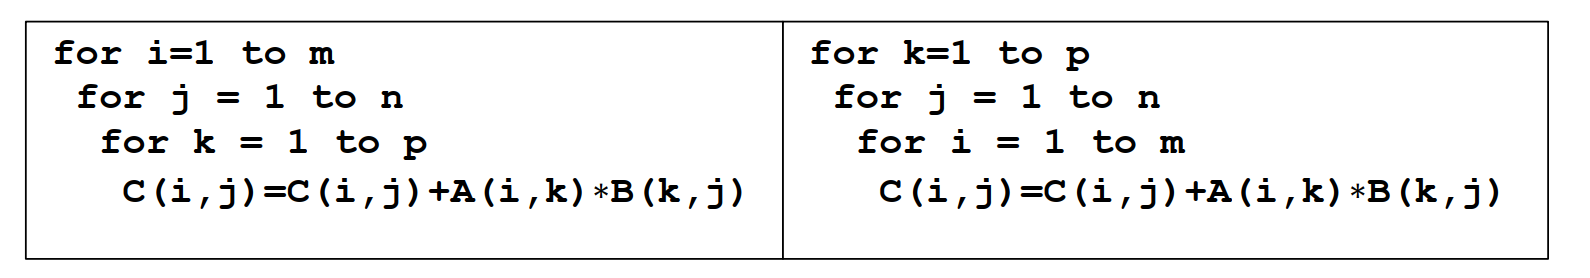

## 2.a.

Implement the two versions in Python (or Matlab) and compare the cpu-time for each
version. Are there any differences in the time it takes to do the calculations?
You can create the matrices 𝐴 and 𝐵 as random matrices. Implement the two
algorithms in two different functions and calculate the time it takes for the function to
run. In Python, use **time.process_time** (you might have to import time). In
order to calculate cpu-time that you can trust, you’ll need choose matrix sizes that
takes at least order of seconds to calculate (let’s say around 30 seconds)

In [11]:
def algo1(A,B):
    m = A.shape[0]
    p = A.shape[1]
    assert p == B.shape[0]
    n = B.shape[1]
    C = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            for k in range(p):
                C[i][j] += A[i][k]*B[k][j]
    return C
    

def algo2(A,B):
    m = A.shape[0]
    p = A.shape[1]
    assert p == B.shape[0]
    n = B.shape[1]
    C = np.zeros((m, n))
    for k in range(p):
        for j in range(n):
            for i in range(m):
                C[i][j] += A[i][k]*B[k][j]
    return C
    

In [12]:
randMN = 400

M1 = np.random.rand(randMN,randMN)
M2 = np.random.rand(randMN,randMN)

# Check validity
# assert repeatedDot(M1,M2).all() == alt(M1,M2).all() == np.matmul(M1,M2).all()

t1_start = process_time()
algo1(M1,M2)
t1_stop = process_time()

t2_start = process_time()
algo2(M1,M2)
t2_stop = process_time()


print(f'Time for algorithm 1: {t1_stop - t1_start} seconds.')
print(f'Time for algorithm 2: {t2_stop - t2_start} seconds.')

Time for algorithm 1: 36.555020999999996 seconds.
Time for algorithm 2: 36.195688000000004 seconds.


**Comment:** There is no significant time difference between the two algorithms. We would not expect there to be one since they both have three nested loops based on the same variables and therefore both have time complexity $O(n^3)$.

## 2.b.
The leftmost algorithm is based on repeated dot-products, but what basic operation is
the 2nd (rightmost) algorithm based on?

Whereas the first algorithm uses the row view, the second algorithm uses the column view which sees $A\mathbf{x}$
as a linear combination of A's columns.